In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load the dataset
data = pd.read_csv('/TrafficDataset.csv')
print("\n")
print("\n")
# Display the first 5 rows
print(data.head())
print("\n")
print("\n")
# Check for missing values
print(data.isnull().sum())
print("\n")

# Summary statistics
print(data.describe())







  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  




holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_v

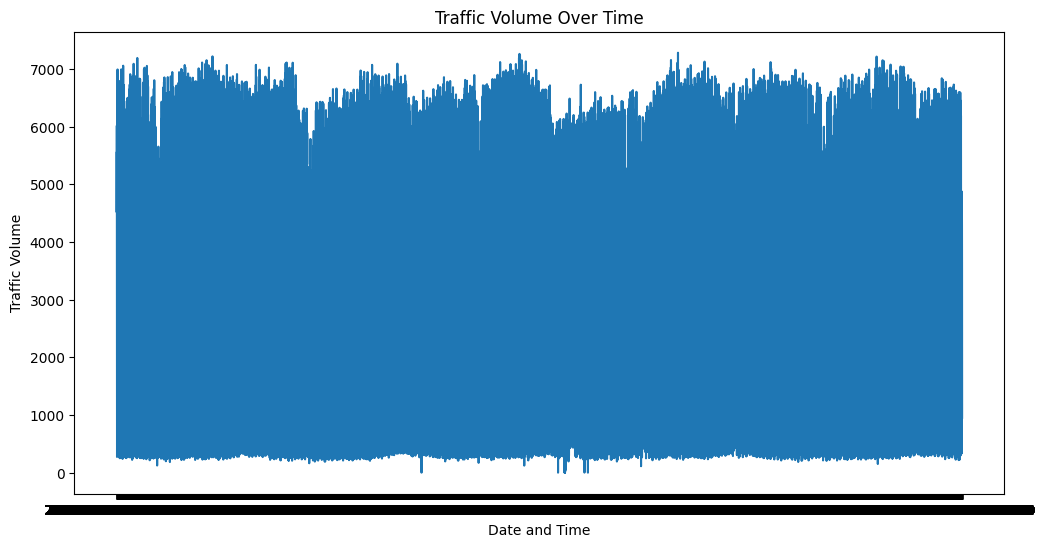

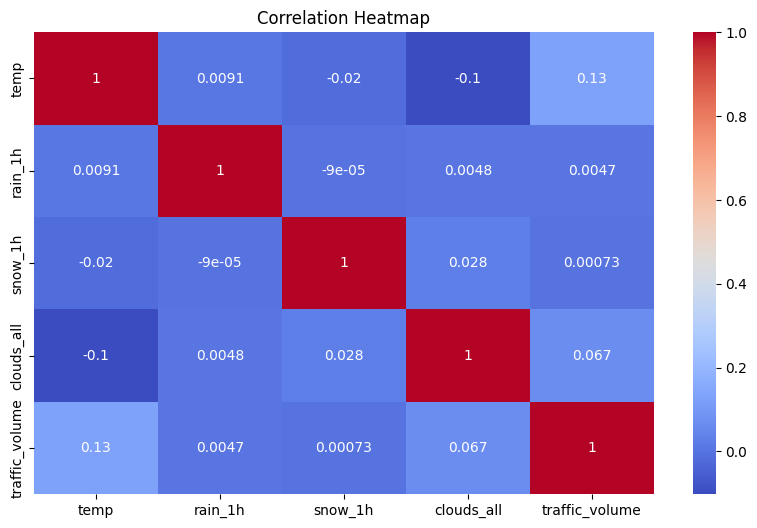

In [ ]:
# Visualize traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(data['date_time'], data['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Volume')
plt.show()

# Correlation heatmap

plt.figure(figsize=(10, 6))
# Exclude non-numeric columns (e.g., 'date_time') before calculating correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
#Build a Predictive Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare features and target
data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.dayofweek

features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
X = data[features]
y = data['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 217764.37427531288
Root Mean Squared Error (RMSE): 466.65230555019536
Mean Absolute Error (MAE): 255.4095293303747
R-squared (R²): 0.9449187738903555


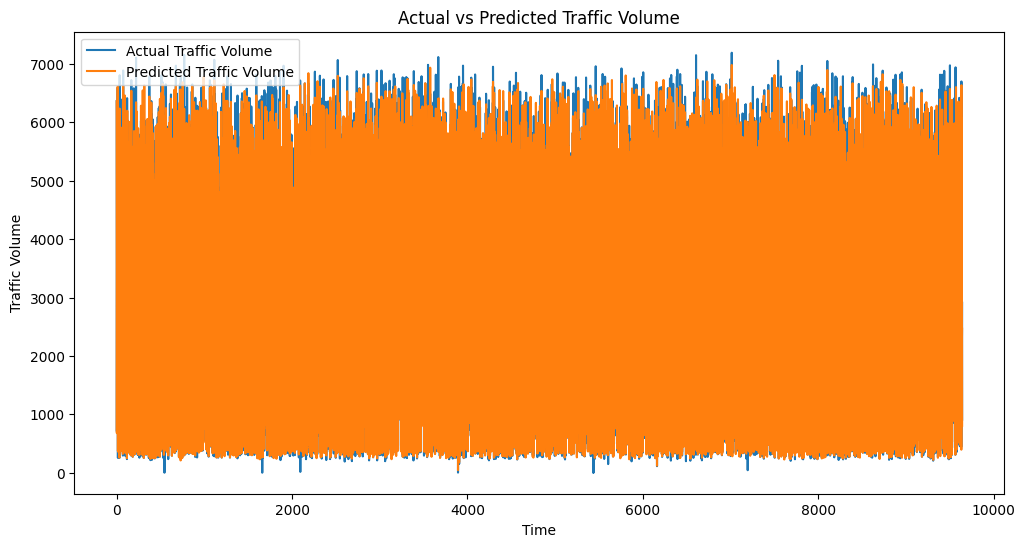

In [27]:
#Visualize the predicted vs actual traffic volume to see how well the model performs.
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Traffic Volume')
plt.plot(y_pred, label='Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()